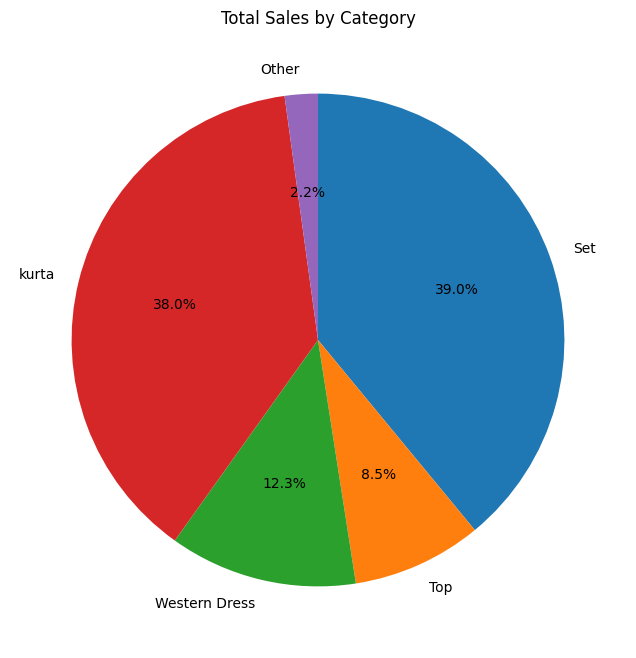

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with low_memory=False to prevent DtypeWarning
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Filter out unwanted orders based on Status and Qty
df = df[(df['Status'] != 'Cancelled') & (df['Status'] != 'Pending') & (df['Qty'] >= 1)]

# Group by Category and count unique Order IDs to get total sales
summary = df.groupby('Category')['Order ID'].nunique().reset_index(name='Total Sales')

# Sum up the smaller categories (Blouse, Bottom, Dupatta, Ethnic Dress)
other_categories = summary[summary['Category'].isin(['Blouse', 'Bottom', 'Dupatta', 'Ethnic Dress','Saree'])]

# Calculate total sales for "Other"
other_sales = other_categories['Total Sales'].sum()

# Filter out the grouped categories from the original summary
summary = summary[~summary['Category'].isin(['Blouse', 'Bottom', 'Dupatta', 'Ethnic Dress','Saree'])]

# Add "Other" category using pd.concat()
other_row = pd.DataFrame({'Category': ['Other'], 'Total Sales': [other_sales]})
summary = pd.concat([summary, other_row], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(summary['Total Sales'], labels=summary['Category'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Total Sales by Category')

# Display the pie chart
plt.show()

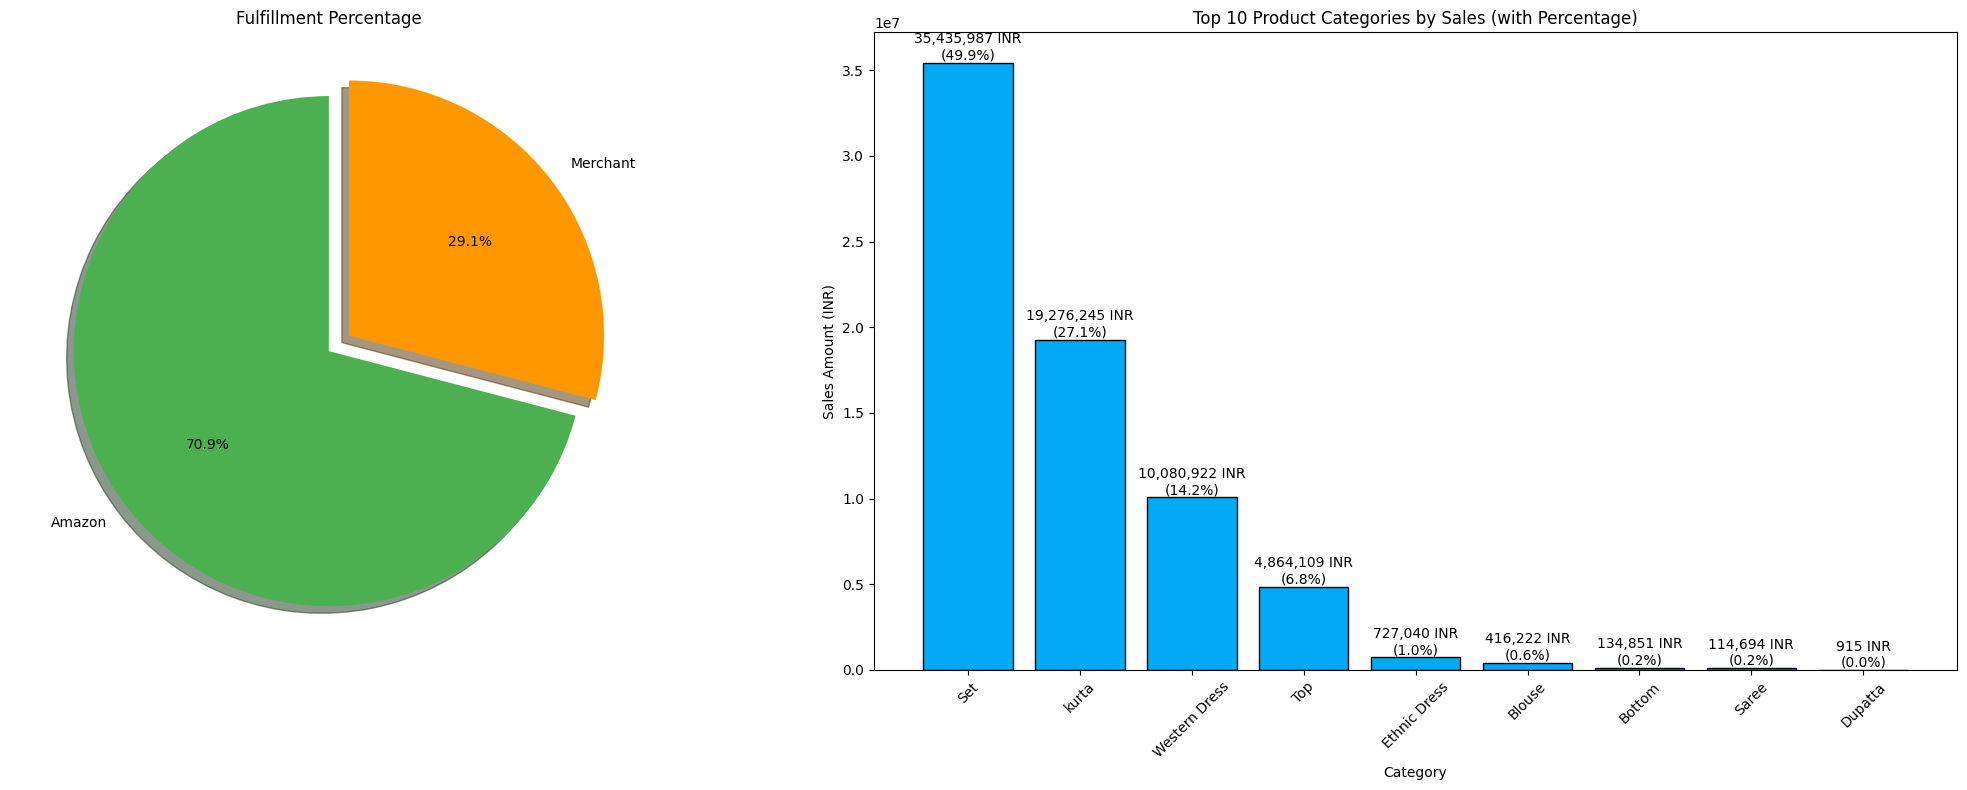

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with low_memory=False to prevent DtypeWarning
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Filter relevant rows (valid orders)
valid_orders = df[df["Status"].str.contains("Shipped", case=False, na=False)]

# Calculate total sales
total_sales = valid_orders["Amount"].sum()

# Fulfillment percentage
fulfillment_counts = valid_orders["Fulfilment"].value_counts(normalize=True) * 100

# Sales breakdown by category (Top 10)
category_sales = valid_orders.groupby("Category")["Amount"].sum().sort_values(ascending=False)
category_sales_pct = (category_sales / total_sales) * 100

# Adjust the figure size for better fit
fig, axes = plt.subplots(1, 2, figsize=(22, 8))  # Increased width for better fit

# === Plot 1: Fulfillment Percentage Pie Chart ===
fulfillment_counts.plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    startangle=90,
    explode=(0, 0.1),
    colors=['#4CAF50', '#FF9800'],
    shadow=True
)
axes[0].set_ylabel('')  # Remove y-label for cleaner plot
axes[0].set_title('Fulfillment Percentage')

# === Plot 2: Top 10 Categories with Amount & Percentage ===
top_10_categories = category_sales.head(10)
top_10_categories_pct = category_sales_pct.head(10)

bars = axes[1].bar(
    top_10_categories.index, 
    top_10_categories, 
    color='#03A9F4', 
    edgecolor='black'
)

# Add sales amount and percentage labels on top of the bars
for bar, amount, pct in zip(bars, top_10_categories, top_10_categories_pct):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 10000, 
        f"{amount:,.0f} INR\n({pct:.1f}%)", 
        ha='center', 
        va='bottom'
    )

# Configure the bar chart
axes[1].set_title('Top 10 Product Categories by Sales (with Percentage)')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Sales Amount (INR)')
axes[1].tick_params(axis='x', rotation=45)

# Ensure the layout fits well
fig.subplots_adjust(wspace=0.3)  # Add space between plots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Check if the data is loaded properly
print(amazon_sales_data.head())  # Preview the first few rows

# Grouping by 'Status' to see the percentage distribution
order_status_counts = amazon_sales_data['Status'].value_counts(normalize=True) * 100

# Filtering for 'Shipped' vs 'Cancelled' and calculating percentage distribution
shipped_cancelled = amazon_sales_data[amazon_sales_data['Status'].isin(['Shipped', 'Cancelled'])]
shipped_cancelled_counts = shipped_cancelled['Status'].value_counts(normalize=True) * 100

# Display the results
print("Order Status Distribution:\n", order_status_counts)
print("\nShipped vs Cancelled Distribution:\n", shipped_cancelled_counts)


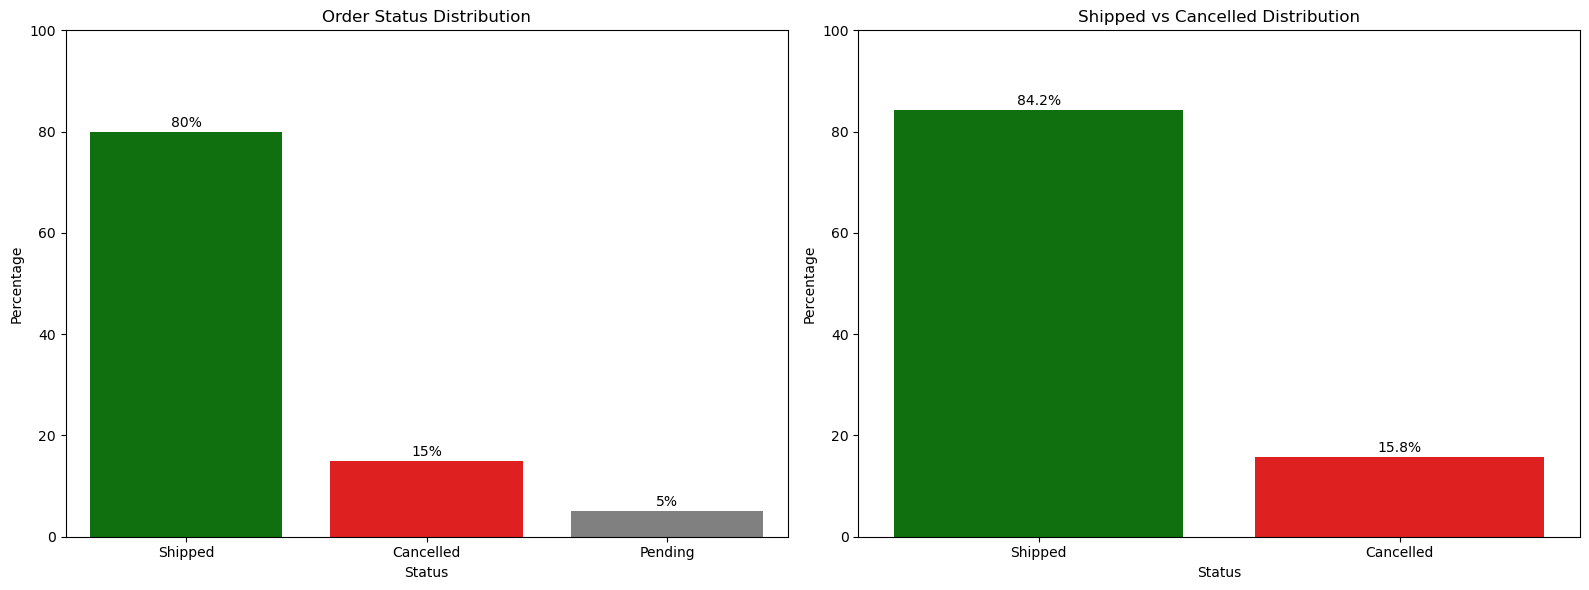

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for the order status distribution (in percentage)
data = {
    'Status': ['Shipped', 'Cancelled', 'Pending'],
    'Percentage': [80, 15, 5]
}
order_status_counts = pd.DataFrame(data)

# Filtered data for shipped vs cancelled
shipped_cancelled_data = {
    'Status': ['Shipped', 'Cancelled'],
    'Percentage': [84.2, 15.8]
}
shipped_cancelled_counts = pd.DataFrame(shipped_cancelled_data)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# === First Plot: Full Order Status Distribution ===
sns.barplot(
    data=order_status_counts,
    x='Status',
    y='Percentage',
    hue='Status',  # Assign Status to hue
    ax=axes[0],
    palette=['green', 'red', 'gray'],
    legend=False  # Disable the legend
)
axes[0].set_title('Order Status Distribution')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 100)

# Add percentage labels on top of the bars
for index, row in order_status_counts.iterrows():
    axes[0].text(
        index, 
        row['Percentage'] + 1, 
        f"{row['Percentage']}%", 
        ha='center'
    )

# === Second Plot: Shipped vs Cancelled Distribution ===
sns.barplot(
    data=shipped_cancelled_counts,
    x='Status',
    y='Percentage',
    hue='Status',  # Assign Status to hue
    ax=axes[1],
    palette=['green', 'red'],
    legend=False  # Disable the legend
)
axes[1].set_title('Shipped vs Cancelled Distribution')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)

# Add percentage labels on top of the bars
for index, row in shipped_cancelled_counts.iterrows():
    axes[1].text(
        index, 
        row['Percentage'] + 1, 
        f"{row['Percentage']}%", 
        ha='center'
    )

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Data Cleaning
# Convert 'Date' to datetime format
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y')

# Filter for valid records
valid_data = amazon_sales_data[(amazon_sales_data['Status'] == 'Shipped') &
                               (amazon_sales_data['Qty'] >= 1) &
                               (amazon_sales_data['Amount'] > 0) &
                               (amazon_sales_data['ship-city'].notnull()) &
                               (amazon_sales_data['ship-state'].notnull()) &
                               (amazon_sales_data['ship-postal-code'].notnull())]

# Group by month and count orders
monthly_sales = valid_data.groupby(valid_data['Date'].dt.strftime('%m'))['Order ID'].count()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)

# Add value labels above each bar
for i, v in enumerate(monthly_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Data Cleaning
# Convert 'Date' to datetime format
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y')
amazon_sales_data['Month'] = amazon_sales_data['Date'].dt.month


# Filter for valid records and March sales
valid_data = amazon_sales_data[
    (amazon_sales_data['Status'] == 'Shipped') &
    (amazon_sales_data['Qty'] >= 1) &
    (amazon_sales_data['Amount'] > 0) &
    amazon_sales_data[['ship-city', 'ship-state', 'ship-postal-code']].notnull().all(axis=1)
]

# Define promotion categories based on 'promotion-ids' presence
valid_data['Promotion Type'] = valid_data['promotion-ids'].apply(
    lambda x: 'Promotion Sales' if pd.notnull(x) else 'Normal Sales'
)

# Group by month and promotion type, then count orders
monthly_sales = valid_data.groupby(['Month', 'Promotion Type'])['Order ID'].count().reset_index()

# Loop through each unique month and print the table for that month
for month in monthly_sales['Month'].unique():
    month_sales = monthly_sales[monthly_sales['Month'] == month]
    print(f"\nSales data for month {month}:")
    print(month_sales[['Promotion Type', 'Order ID']].rename(columns={'Order ID': 'Sales Count'}))




C:\Users\User\AppData\Local\Temp\ipykernel_24496\612288999.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Type'] = valid_data['promotion-ids'].apply(



Sales data for March:
              Type  Sales Count
0     Normal Sales           44
1  Promotion Sales           91


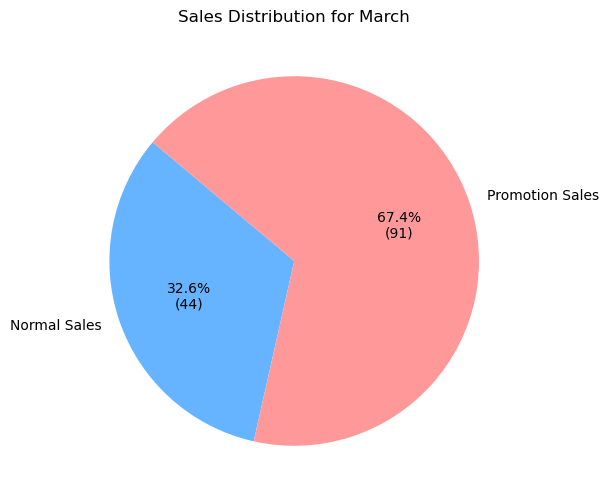


Sales data for April:
              Type  Sales Count
2     Normal Sales        10635
3  Promotion Sales        17712


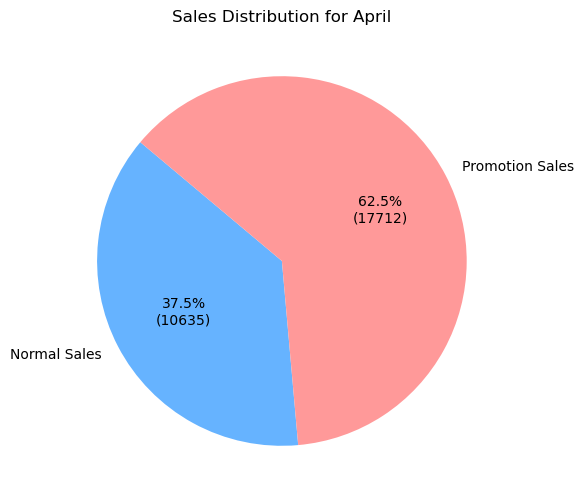


Sales data for May:
              Type  Sales Count
4     Normal Sales         9337
5  Promotion Sales        15158


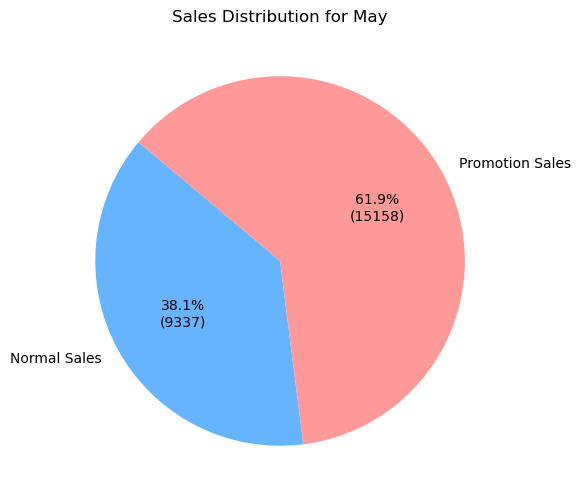


Sales data for June:
              Type  Sales Count
6     Normal Sales         9237
7  Promotion Sales        13848


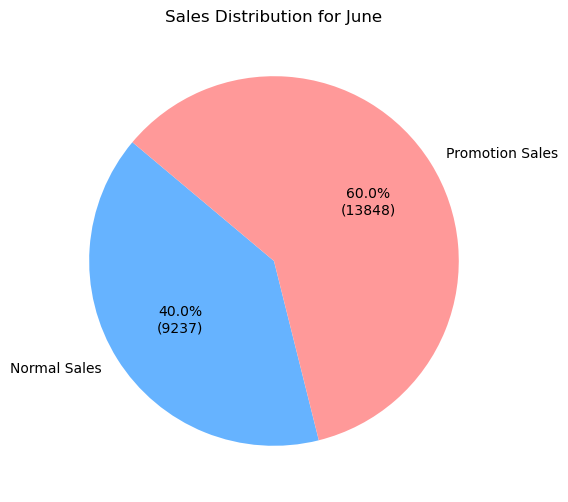

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the dataset
amazon_sales_data = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# Data Cleaning
# Convert 'Date' to datetime format and extract the month
amazon_sales_data['Date'] = pd.to_datetime(amazon_sales_data['Date'], format='%m-%d-%y')
amazon_sales_data['Month'] = amazon_sales_data['Date'].dt.month

# Filter for valid records only
valid_data = amazon_sales_data[
    (amazon_sales_data['Status'] == 'Shipped') &
    (amazon_sales_data['Qty'] >= 1) &
    (amazon_sales_data['Amount'] > 0) &
    amazon_sales_data[['ship-city', 'ship-state', 'ship-postal-code']].notnull().all(axis=1)
]

# Define promotion categories based on 'promotion-ids' presence
valid_data['Type'] = valid_data['promotion-ids'].apply(
    lambda x: 'Promotion Sales' if pd.notnull(x) else 'Normal Sales'
)

# Group by month and type, then count orders
monthly_sales = valid_data.groupby(['Month', 'Type'])['Order ID'].count().reset_index()

# Custom function to display percentage and actual count on the pie chart
def autopct_with_values(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{pct:.1f}%\n({absolute})"

# Loop through each unique month and print the table with the month name
for month in monthly_sales['Month'].unique():
    # Get the month name from the month number
    month_name = calendar.month_name[month]
    month_sales = monthly_sales[monthly_sales['Month'] == month]
    
    print(f"\nSales data for {month_name}:")
    print(month_sales[['Type', 'Order ID']].rename(columns={'Order ID': 'Sales Count'}))

    # Plot the pie chart for the month
    plt.figure(figsize=(6, 6))
    plt.pie(
        month_sales['Order ID'], 
        labels=month_sales['Type'], 
        autopct=lambda pct: autopct_with_values(pct, month_sales['Order ID']),
        startangle=140, 
        colors=['#66b3ff','#ff9999']
    )
    plt.title(f"Sales Distribution for {month_name}")
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


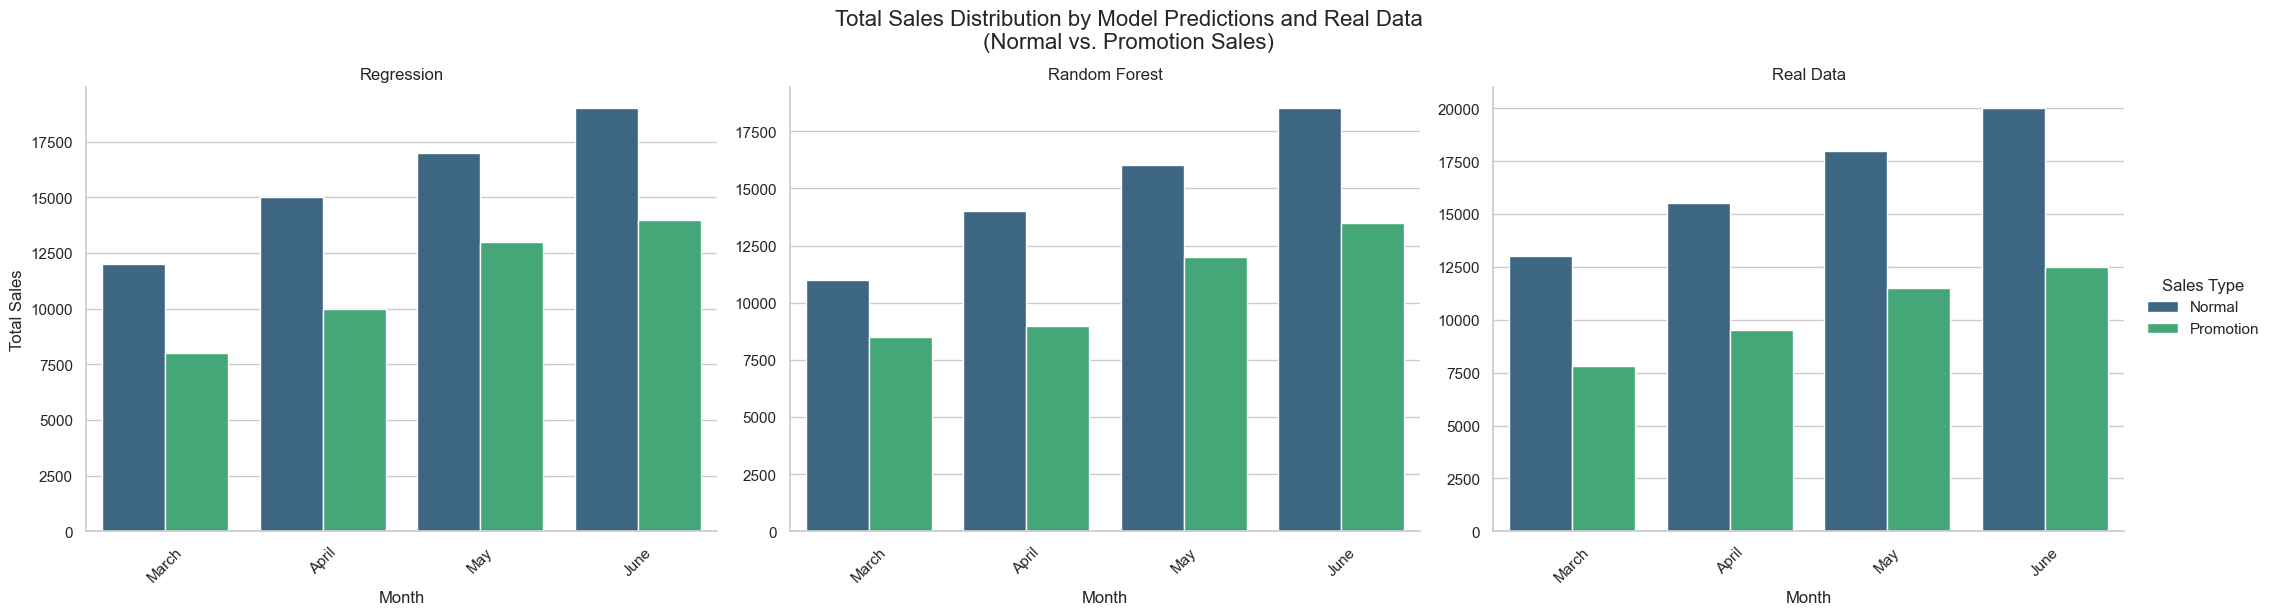

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample data structure: Replace these values with actual predictions and real data
data = {
    'Month': ['March', 'March', 'March', 'March', 'March', 'March',
              'April', 'April', 'April', 'April', 'April', 'April',
              'May', 'May', 'May', 'May', 'May', 'May',
              'June', 'June', 'June', 'June', 'June', 'June'],
    'Model Type': ['Regression', 'Regression', 'Random Forest', 'Random Forest', 'Real Data', 'Real Data'] * 4,
    'Sales Type': ['Normal', 'Promotion'] * 12,
    'Total Sales': [12000, 8000, 11000, 8500, 13000, 7800,  # March
                    15000, 10000, 14000, 9000, 15500, 9500,  # April
                    17000, 13000, 16000, 12000, 18000, 11500, # May
                    19000, 14000, 18500, 13500, 20000, 12500] # June
}

# Create DataFrame
df = pd.DataFrame(data)

# Set Seaborn style
sns.set(style="whitegrid")

# Initialize a FacetGrid with Model Type as columns
g = sns.FacetGrid(df, col="Model Type", height=6, aspect=1.2, sharey=False)

# Map a barplot onto each facet
g.map_dataframe(sns.barplot, x='Month', y='Total Sales', hue='Sales Type', palette='viridis', ci=None, dodge=True)

# Adjust the legend
g.add_legend(title='Sales Type')

# Set titles for each facet
g.set_titles("{col_name}")

# Set overall plot title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Total Sales Distribution by Model Predictions and Real Data\n(Normal vs. Promotion Sales)', fontsize=16)

# Set axis labels
g.set_axis_labels("Month", "Total Sales")

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3068\4222720264.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=promotional_df, x='Month', y='Total Sales', hue='Model_Sales_Type', palette='viridis', ci=None, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_3068\4222720264.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=non_promotional_df, x='Month', y='Total Sales', hue='Model_Sales_Type', palette='viridis', ci=None, ax=axes[1])


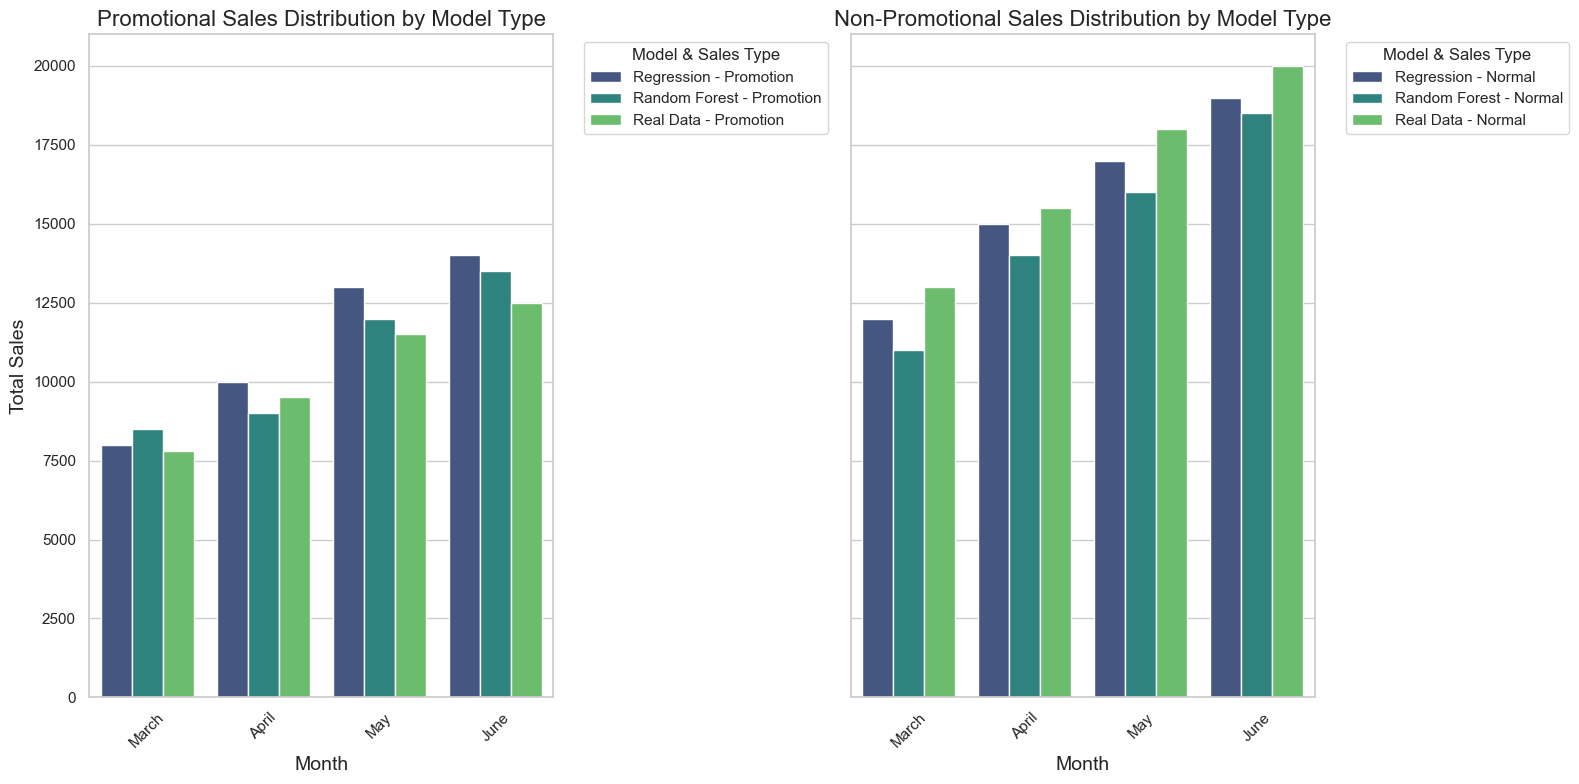

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data structure: Replace these values with actual predictions and real data
data = {
    'Month': ['March', 'March', 'March', 'March', 'March', 'March',
              'April', 'April', 'April', 'April', 'April', 'April',
              'May', 'May', 'May', 'May', 'May', 'May',
              'June', 'June', 'June', 'June', 'June', 'June'],
    'Model Type': ['Regression', 'Regression', 'Random Forest', 'Random Forest', 'Real Data', 'Real Data'] * 4,
    'Sales Type': ['Normal', 'Promotion'] * 12,
    'Total Sales': [12000, 8000, 11000, 8500, 13000, 7800,  # March
                    15000, 10000, 14000, 9000, 15500, 9500,  # April
                    17000, 13000, 16000, 12000, 18000, 11500, # May
                    19000, 14000, 18500, 13500, 20000, 12500] # June
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a new column combining Model Type and Sales Type if not already present
df['Model_Sales_Type'] = df['Model Type'] + ' - ' + df['Sales Type']

# Set Seaborn style
sns.set(style="whitegrid")

# Split the data into promotional and non-promotional DataFrames
promotional_df = df[df['Sales Type'] == 'Promotion']
non_promotional_df = df[df['Sales Type'] == 'Normal']

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for promotional sales
sns.barplot(data=promotional_df, x='Month', y='Total Sales', hue='Model_Sales_Type', palette='viridis', ci=None, ax=axes[0])
axes[0].set_title('Promotional Sales Distribution by Model Type', fontsize=16)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].set_ylabel('Total Sales', fontsize=14)
axes[0].legend(title='Model & Sales Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Plot for non-promotional sales
sns.barplot(data=non_promotional_df, x='Month', y='Total Sales', hue='Model_Sales_Type', palette='viridis', ci=None, ax=axes[1])
axes[1].set_title('Non-Promotional Sales Distribution by Model Type', fontsize=16)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].legend(title='Model & Sales Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


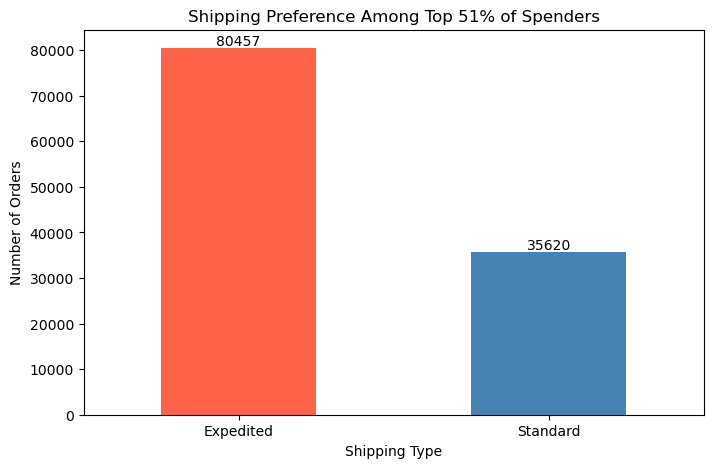

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and filter the dataset
file_path = 'Amazon Sale Report.csv'
data = pd.read_csv(file_path, low_memory=False)
filtered_data = data[data['ship-service-level'].isin(['Expedited', 'Standard'])]

# Sort by amount spent in descending order
sorted_data = filtered_data.sort_values(by='Amount', ascending=False)

# Determine the index cutoff for the top 51%
cutoff_index = int(len(sorted_data) * 0.90)
top_51_data = sorted_data.iloc[:cutoff_index]

# Count shipping preferences among the top 51%
shipping_preference_counts = top_51_data['ship-service-level'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = shipping_preference_counts.plot(kind='bar', color=['#FF6347', '#4682B4'])
plt.title("Shipping Preference Among Top 51% of Spenders")
plt.xlabel("Shipping Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

# Annotate bars with the actual counts
for index, value in enumerate(shipping_preference_counts):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


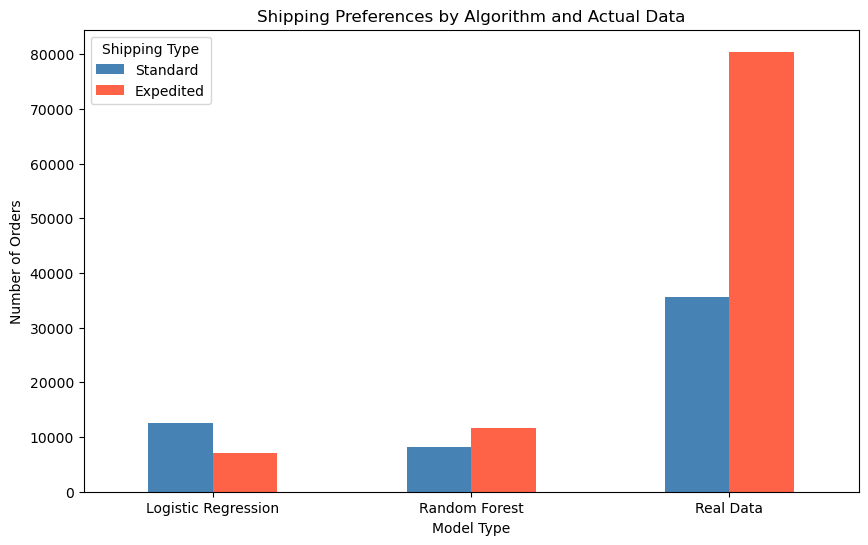

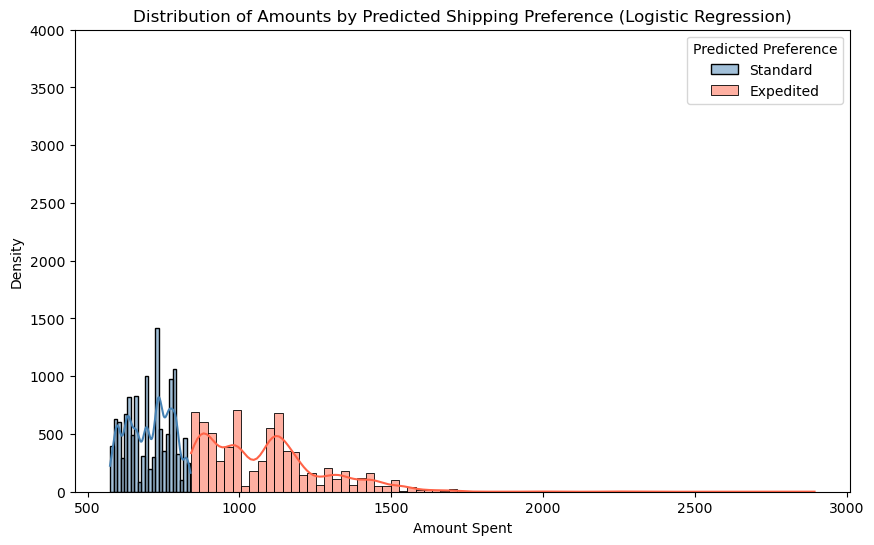

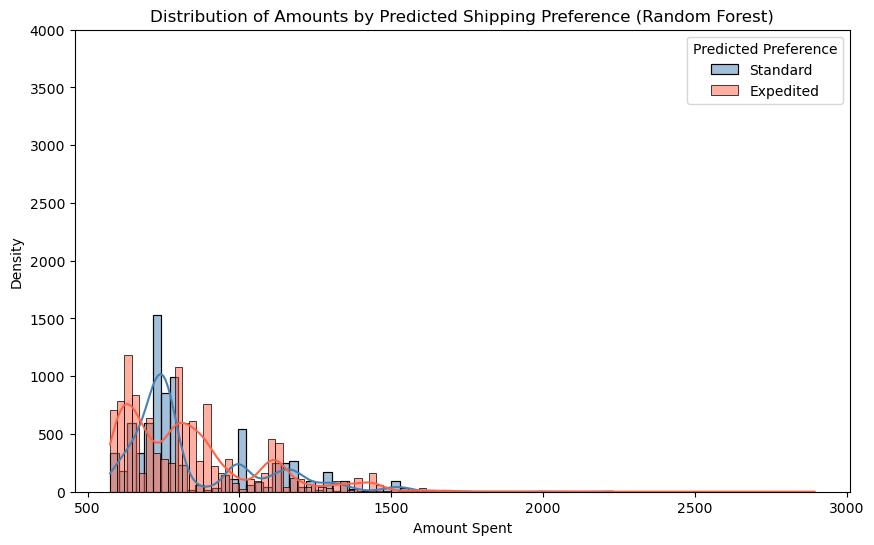

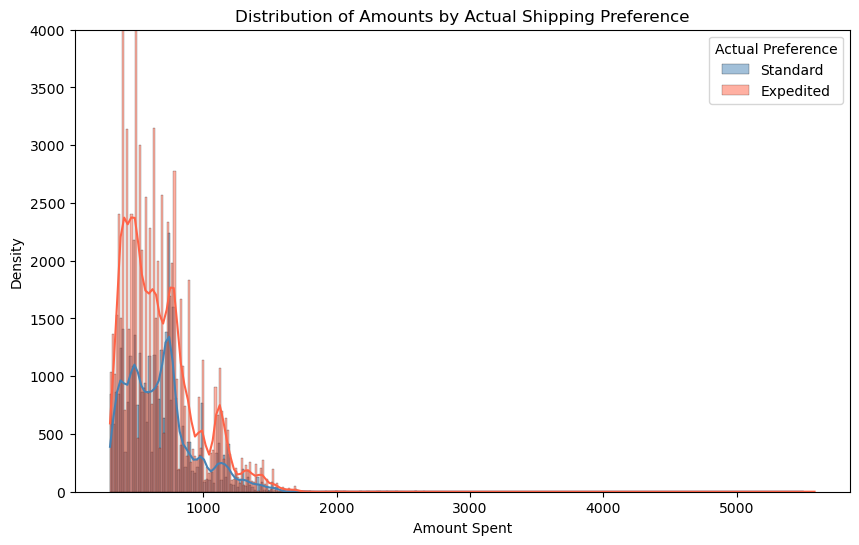

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load and filter the dataset
file_path = 'Amazon Sale Report.csv'
data = pd.read_csv(file_path, low_memory=False)
filtered_data = data[data['ship-service-level'].isin(['Expedited', 'Standard'])]

# Create binary target variable
filtered_data['ship_service_binary'] = filtered_data['ship-service-level'].apply(lambda x: 1 if x == 'Expedited' else 0)

# Sort by amount spent and select top 51% of spenders
sorted_data = filtered_data.sort_values(by='Amount', ascending=False)
cutoff_index = int(len(sorted_data) * 0.51)
top_51_data = sorted_data.iloc[:cutoff_index]

# Features and target
X = top_51_data[['Amount']]
y = top_51_data['ship_service_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test_scaled)

# Count shipping preferences among the top 51% for actual data comparison
cutoff_index_real = int(len(sorted_data) * 0.90)  # 90% cutoff
top_51_real_data = sorted_data.iloc[:cutoff_index_real]
shipping_preference_counts = top_51_real_data['ship-service-level'].value_counts()

# Prepare data for the bar plot
plot_data = pd.DataFrame({
    'Standard': [
        sum(y_pred_log_reg == 0), 
        sum(y_pred_rf == 0), 
        shipping_preference_counts.get('Standard', 0)
    ],
    'Expedited': [
        sum(y_pred_log_reg == 1), 
        sum(y_pred_rf == 1), 
        shipping_preference_counts.get('Expedited', 0)
    ]
}, index=['Logistic Regression', 'Random Forest', 'Real Data'])

# Plotting the grouped bar chart
plot_data.plot(kind='bar', figsize=(10, 6), color=['#4682B4', '#FF6347'])
plt.title('Shipping Preferences by Algorithm and Actual Data')
plt.xlabel('Model Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Shipping Type')

plt.show()


# Add the model predictions to the test set for visualization
X_test['Predicted_LogReg'] = y_pred_log_reg
X_test['Predicted_RF'] = y_pred_rf

# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
sns.histplot(X_test[X_test['Predicted_LogReg'] == 0]['Amount'], kde=True, color='#4682B4', label="Standard", alpha=0.5)
sns.histplot(X_test[X_test['Predicted_LogReg'] == 1]['Amount'], kde=True, color='#FF6347', label="Expedited", alpha=0.5)
plt.title("Distribution of Amounts by Predicted Shipping Preference (Logistic Regression)")
plt.xlabel("Amount Spent")
plt.ylabel("Density")
plt.ylim(0, 4000)  # Set y-axis range
plt.legend(title="Predicted Preference")
plt.show()

# Plot for Random Forest
plt.figure(figsize=(10, 6))
sns.histplot(X_test[X_test['Predicted_RF'] == 0]['Amount'], kde=True, color='#4682B4', label="Standard", alpha=0.5)
sns.histplot(X_test[X_test['Predicted_RF'] == 1]['Amount'], kde=True, color='#FF6347', label="Expedited", alpha=0.5)
plt.title("Distribution of Amounts by Predicted Shipping Preference (Random Forest)")
plt.xlabel("Amount Spent")
plt.ylabel("Density")
plt.ylim(0, 4000)  # Set y-axis range
plt.legend(title="Predicted Preference")
plt.show()

# Plot for Actual Data
plt.figure(figsize=(10, 6))
sns.histplot(top_51_real_data[top_51_real_data['ship-service-level'] == 'Standard']['Amount'], kde=True, color='#4682B4', label="Standard", alpha=0.5)
sns.histplot(top_51_real_data[top_51_real_data['ship-service-level'] == 'Expedited']['Amount'], kde=True, color='#FF6347', label="Expedited", alpha=0.5)
plt.title("Distribution of Amounts by Actual Shipping Preference")
plt.xlabel("Amount Spent")
plt.ylabel("Density")
plt.ylim(0, 4000)  # Set y-axis range
plt.legend(title="Actual Preference")
plt.show()


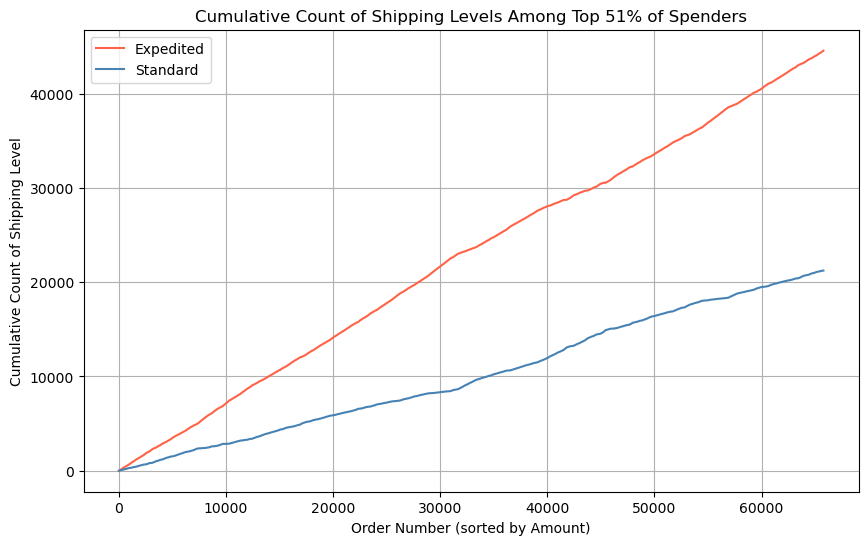

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and filter the dataset
file_path = 'Amazon Sale Report.csv'
data = pd.read_csv(file_path, low_memory=False)
filtered_data = data[data['ship-service-level'].isin(['Expedited', 'Standard'])]

# Sort by amount spent in descending order
sorted_data = filtered_data.sort_values(by='Amount', ascending=False)

# Determine the index cutoff for the top 51%
cutoff_index = int(len(sorted_data) * 0.51)
top_51_data = sorted_data.iloc[:cutoff_index]

# Reset index for easy plotting
top_51_data = top_51_data.reset_index(drop=True)

# Create a cumulative count column for each shipping level
top_51_data['Expedited_CumCount'] = (top_51_data['ship-service-level'] == 'Expedited').cumsum()
top_51_data['Standard_CumCount'] = (top_51_data['ship-service-level'] == 'Standard').cumsum()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(top_51_data.index, top_51_data['Expedited_CumCount'], label='Expedited', color='#FF6347')
plt.plot(top_51_data.index, top_51_data['Standard_CumCount'], label='Standard', color='#4682B4')

# Add labels and title
plt.title("Cumulative Count of Shipping Levels Among Top 51% of Spenders")
plt.xlabel("Order Number (sorted by Amount)")
plt.ylabel("Cumulative Count of Shipping Level")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

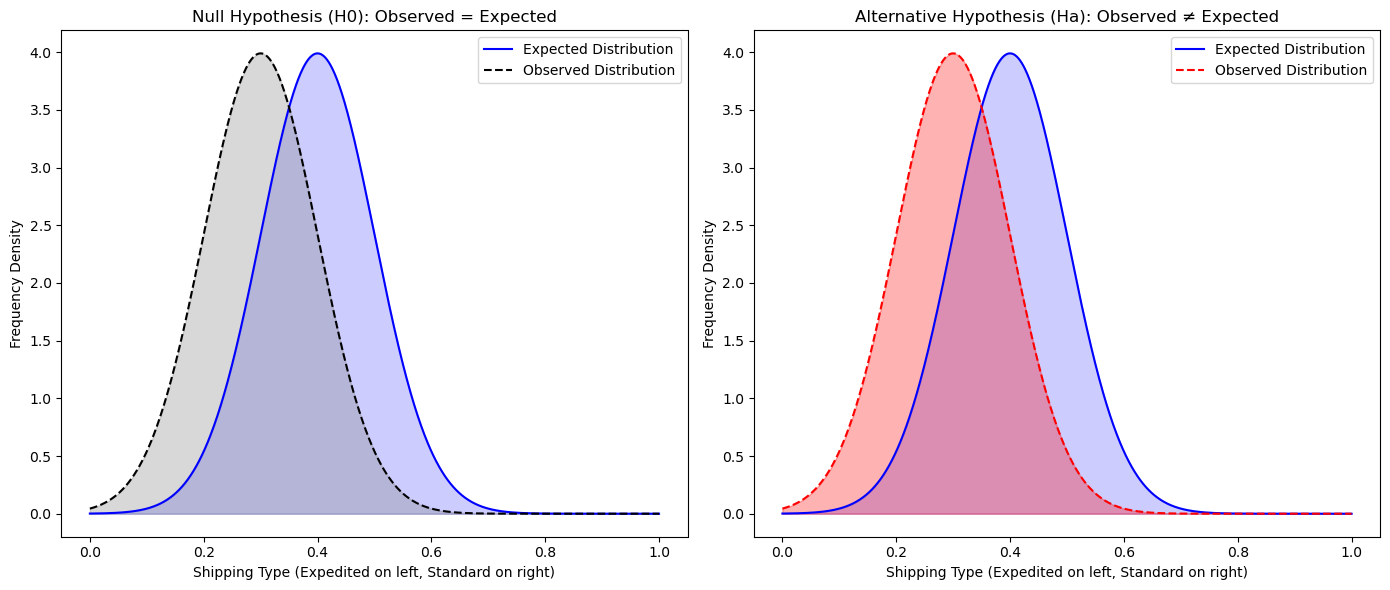

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Hypothetical data based on chi-square contingency test concept

# Expected distribution: Normal distribution around 0.4 (hypothetical mean for expected)
expected_mean = 0.4
expected_std = 0.1
x = np.linspace(0, 1, 1000)
expected_dist = norm.pdf(x, expected_mean, expected_std)

# Observed distribution: Slightly different mean to represent alternative hypothesis
observed_mean = 0.3  # hypothetical observed mean
observed_std = 0.1
observed_dist = norm.pdf(x, observed_mean, observed_std)

# Plotting the distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Null Hypothesis Plot (H0: Observed = Expected)
axes[0].plot(x, expected_dist, 'b-', label='Expected Distribution')
axes[0].plot(x, observed_dist, 'k--', label='Observed Distribution')
axes[0].fill_between(x, 0, expected_dist, color='blue', alpha=0.2)
axes[0].fill_between(x, 0, observed_dist, color='gray', alpha=0.3)
axes[0].set_title("Null Hypothesis (H0): Observed = Expected")
axes[0].set_xlabel("Shipping Type (Expedited on left, Standard on right)")
axes[0].set_ylabel("Frequency Density")
axes[0].legend()

# Alternative Hypothesis Plot (Ha: Observed ≠ Expected)
axes[1].plot(x, expected_dist, 'b-', label='Expected Distribution')
axes[1].plot(x, observed_dist, 'r--', label='Observed Distribution')
axes[1].fill_between(x, 0, expected_dist, color='blue', alpha=0.2)
axes[1].fill_between(x, 0, observed_dist, color='red', alpha=0.3)
axes[1].set_title("Alternative Hypothesis (Ha): Observed ≠ Expected")
axes[1].set_xlabel("Shipping Type (Expedited on left, Standard on right)")
axes[1].set_ylabel("Frequency Density")
axes[1].legend()

plt.tight_layout()
plt.show()
